In [1]:
using Interact

In [2]:
using Gadfly

In [3]:
using DataFrames

In [4]:
apparatus(n) = ones(Int64, n, 1);

In [5]:
function measure(S, n) 
    samples = rand(0:1, S, n)
    measurement = samples * apparatus(n)
    hist(measurement, [-1:n])[2]/S
end

measure (generic function with 1 method)

In [6]:
ideal(n) = [ binomial(n, r) for r in 0:n]/2^n


ideal (generic function with 1 method)

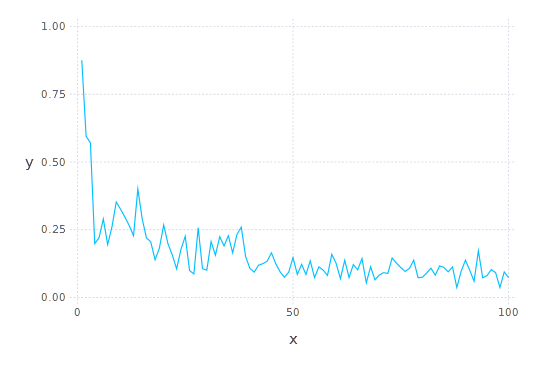

In [7]:
plot(x=[1:100], y=[ norm(measure(S, 10) - ideal(10)) for S in 1:100], Geom.line)

This is actually a multinomial distribution with possibilities from 0 to 10 each with its own probability.
$$ \text{pdf} = \frac{S!}{x_0!\cdots x_n!}p_0^{x_0}\cdots p_n^{x_n} $$
With
$$ p_r = {n \choose r}\frac{1}{2^n}$$
It is fairly easy to see, 
$$ \text{Var}(X_r) = Sp_r(1-p_r)$$
Now the leap of faith, this step is wrong, but a reasonable approximation. 
$$ \text{Var} = \sum_r {Var(X_r)} = \sum_r S(p_r - p_r^2) = S(1 - \frac{1}{4^n}{2n \choose n}) \approx S(1 - \frac{1}{\sqrt{\pi n}})$$
And our Error is:
$$ \text{RMS} = \sqrt{\frac{1}{S^2} \text{Var}} \approx \frac{1}{\sqrt{S}}\times \sqrt{1 - \frac{1}{\sqrt{\pi n}}}\approx \frac{1}{\sqrt{S}}$$

In [8]:
function RMSApprox(S, n)
    return sqrt((1-1/sqrt(π*n))/S)
end

RMSApprox (generic function with 1 method)

In [9]:
function RMSExact(S, n)
    return sqrt(1-binomial(2n, n)/4^n)/sqrt(S)
end

RMSExact (generic function with 1 method)

In [10]:
RMSExact(1, 10)

0.9076359115846215

In [11]:
RMSApprox(1, 10)

0.9064146889722843

In [12]:
RMSExpt(S, n) = norm(measure(S, n) - ideal(n))

RMSExpt (generic function with 1 method)

In [13]:
RMSExptAvg(S, n) = mean([RMSExpt(S, n) for i in 1:10000])

RMSExptAvg (generic function with 1 method)

In [14]:
df1(R,n) = DataFrame(Samples = 1:R, RMS= [ norm(measure(S, n) - ideal(n)) for S in 1:R], label="expt1");

In [15]:
df2(R,n) = DataFrame(Samples = 1:R, RMS= [ norm(measure(S, n) - ideal(n)) for S in 1:R], label="expt2");

In [16]:
df3(R,n) = DataFrame(Samples = 1:R, RMS= [ RMSApprox(S, n) for S in 1:R], label="RMSApprox");

In [17]:
df4(R,n) = DataFrame(Samples = 1:R, RMS = [ RMSExact(S, n) for S in 1:R], label="RMS_Eqn");

In [18]:
df5(R,n) = DataFrame(Samples = 1:R, RMS= [ RMSExptAvg(S, n) for S in 1:R], label="RMS_Experiment");

In [19]:
df(R,n)=vcat(df4(R,n), df5(R, n));

Slider{Int64}([Input{Int64}] 15,"n",15,1:30)

Slider{Int64}([Input{Int64}] 50,"R",50,1:100)

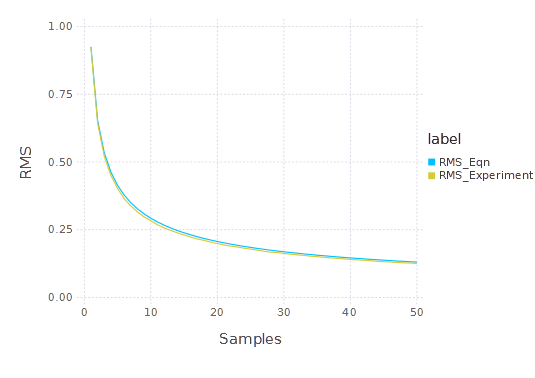

In [20]:
@manipulate for n in 1:30, R in 1:100
    plot(df(R,n), x = "Samples", y = "RMS", color=:label, Geom.line)
end